<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/LAB01_Pr1AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
El problema del alquiler de la vivienda ya forma parte del contexto de la mayoría de grandes ciudades del mundo. Hay varios factores que se enumeran como parte del problema: el turismo masivo, la distribución de las ciudades o el auge de los apartamentos turísticos como es el caso de AirBnB. Lo que si queda claro es que los datos obtenidos del portal sirven para obtener una radiografía más o menos valida de la ciudad. A través del dataset proporcionado en Moodle en el que se miden las estancias en los últimos años en la ciudad de New York. Hay varias preguntas que nos hacemos, que contestaremos a continuación.

# Resolución
## Apartado 1
El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York? 
 
Lo primero que tendremos que hacer es cargar todo el archivo csv en un DataFrame para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.

Para medir  la popularidad/calidad del barrio, tendremos primero  en cuenta el número de apartamentos  de calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”. Para ello primero haremos un par de transformaciones de los datos. La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. Para la columna que indica el número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: “Poco disponible”, “Disponible normalmente” y “Altamente disponible”. Finalmente crearemos una columna para clasificar los apartamentos, teniendo en cuenta las siguientes reglas: 

• Si Reseñas es Baja y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Media y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Alta y Disponibilidad es “Poco disponible” -> “Muy Bueno”

• Si Reseñas es Baja y Disponibilidad es “Disponible normalmente” -> “Regular”

• Si Reseñas es Media y Disponibilidad es “Disponible normalmente” -> “Regular”

• Si Reseñas es Alta y Disponibilidad es “Disponible normalmente” -> “Bueno” 

• Si Reseñas es Baja y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es Media y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es alta y Disponibilidad es “Altamente disponible” -> “Muy malo” 


In [1]:
# Importación de librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.function_base import linspace
from math import floor
from math import ceil
from numpy.ma.core import size

# Lectura de la base de datos
filename = 'airbnb.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los datos
print(data.shape)
data.head(10)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Preparación y limpieza de datos
A continuación, preparamos los datos para el realizar el primer apartado de la práctica 1.

Comenzamos eliminando las filas en función del 'id' que estén duplicadas, ya que no puede haber apartamentos repetidos.

Hemos decidido que en la columna 'reviews_per_month', las casillas que contenga un NaN las pondremos a cero, ya que quiere decir que no tienen ninguna reseña.

In [2]:
data = data.drop_duplicates(subset=['id'], keep='last')
data["reviews_per_month"] = data["reviews_per_month"].replace(np.nan,0)

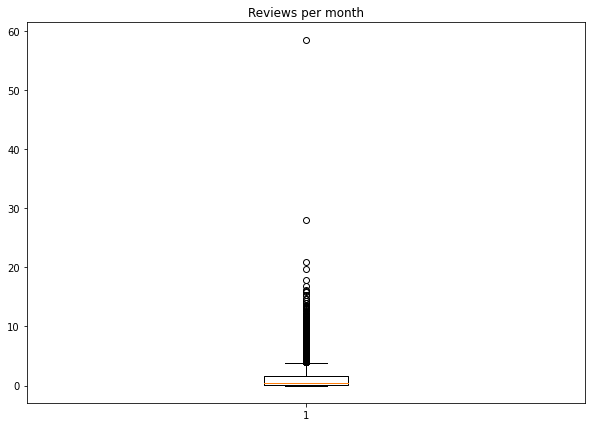

In [3]:
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["reviews_per_month"])
ax.set_title('Reviews per month')

# Dibujar gráfico
plt.show()

Observamos que hay muchos valores outliers (anómalos). Entendemos que como la base de datos proviene de AirBnB y las reseñas solo se pueden realizar con la cuenta desde la cual se realiza la reserva, es decir, aunque haya un apartamento que albergue a un número elevado de personas todos los meses.

Por lo que el número máximo de reseñas por mes será 31. Una por día/usuario reservado (como mucho). De manera que aquellos valores que superen este límite los consideraremos "errores" y procedemos a eliminarlos. 

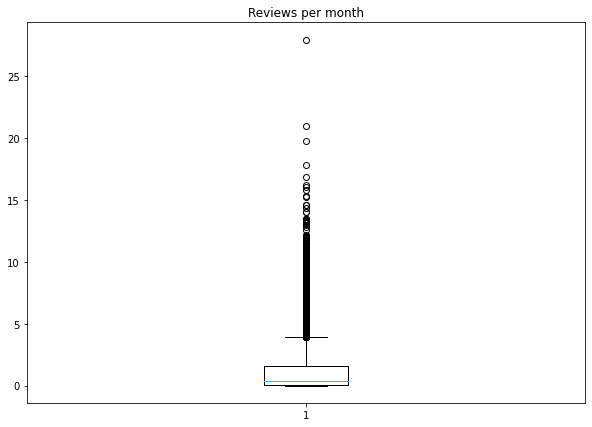

In [4]:
data = data.drop(data[data.reviews_per_month > 31].index)

# Gráfica sin los errores
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["reviews_per_month"])
ax.set_title('Reviews per month')

# Dibujar gráfico
plt.show()

Para poder clasificar la columna 'reviews_per_month' en 3 rangos iguales, redondearemos el mínimo a el entero menor más cercano y el máximo al entero mayor más cercano. Al igual que los límites, el rango será redondeado al entero superior para poder usar la función linspace.

Así nos aseguramos que aunque modifiquen la base de datos de entrada, el código sigue funcionando, sin dejarse ningún dato olvidado.

In [5]:
max = ceil(data.max()['reviews_per_month'])
min = floor(data.min()['reviews_per_month'])
rango = ceil((max - min)/3)

# Primer rango: Baja
data["reviews_per_month"] = data["reviews_per_month"].replace(np.around(np.linspace(min,min+rango, rango*100+1),decimals=2),"Baja")

# Segundo rango: Media
data["reviews_per_month"] = data["reviews_per_month"].replace(np.around(np.linspace(min+rango, min+rango*2, rango*100+1),decimals=2),"Media")

# Tercer rango: Alta
data["reviews_per_month"] = data["reviews_per_month"].replace(np.around(np.linspace(min+rango*2, min+rango*3, rango*100+1),decimals=2),"Alta")


<ipython-input-5-ad478030111f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max = ceil(data.max()['reviews_per_month'])
<ipython-input-5-ad478030111f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min = floor(data.min()['reviews_per_month'])


Realizamos el mismo procedimiento con la columna 'availability_365'.

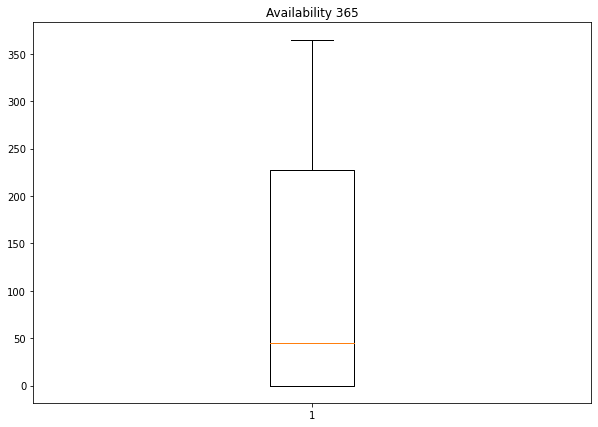

In [6]:
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
ax = fig.add_subplot(111)
ax.boxplot(data["availability_365"])
ax.set_title('Availability 365')

# Dibujar gráfico
plt.show()

Como cabía de esperar, en este caso no hay outliers.

Clasificamos la columna "availability_365" en 3 rangos iguales.

In [7]:
max = ceil(data.max()['availability_365'])
min = floor(data.min()['availability_365'])
rango = ceil((max - min)/3)

# Primer rango: Poco disponible
data["availability_365"] = data["availability_365"].replace(range(min,min+rango),"Poco disponible")

# Segundo rango: Disponible normalmente
data["availability_365"] = data["availability_365"].replace(range(min+rango,min+rango*2),"Disponible normalmente")

# Primer rango: Altamente disponible
data["availability_365"] = data["availability_365"].replace(range(min+rango*2,min+rango*3),"Altamente disponible")

<ipython-input-7-83db2e5d74d8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max = ceil(data.max()['availability_365'])
<ipython-input-7-83db2e5d74d8>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min = floor(data.min()['availability_365'])


###Creación de nuevas columnas

Creamos las columnas 'calification' y 'calification_num'. En la primera columna clasificaremos los apartamentos en función del enunciado (de tipo string); y en la segunda la clasificación será numérica.

En ambas tendremos en cuenta las reseñas y la disponibilidad.

In [8]:
# Añadimos las nuevas columnas vacías
data['calification'] = data.apply(lambda _: '', axis=1)
data['calification_num'] = data.apply(lambda _: '', axis=1)

In [9]:
# Procedemos a rellenar las columnas creadas en función de los datos de "reviews_per_month" y "availability_365".
# Asignamos un valor numérico a cada uno de los atributos Muy mal, Malo, Regular, Bueno y Muy bueno; 1, 2, 3 ,4 y 5 respectivamente.

# Estos son Buenos
data["calification"] = data["calification"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Poco disponible"), "Bueno")
data["calification_num"] = data["calification_num"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Poco disponible"), 4)

data["calification"] = data["calification"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Disponible normalmente"), "Bueno")
data["calification_num"] = data["calification_num"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Disponible normalmente"), 4)

# Estos son Muy Buenos
data["calification"] = data["calification"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Poco disponible"), "Muy Bueno")
data["calification_num"] = data["calification_num"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Poco disponible"), 5)

# Estos son Regulares
data["calification"] = data["calification"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Disponible normalmente"), "Regular")
data["calification_num"] = data["calification_num"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Disponible normalmente"), 3)

# Estos son Malos
data["calification"] = data["calification"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Altamente disponible"), "Malo")
data["calification_num"] = data["calification_num"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Altamente disponible"), 2)

# Estos son Muy Malos
data["calification"] = data["calification"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Altamente disponible"), "Muy malo")
data["calification_num"] = data["calification_num"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Altamente disponible"), 1)

In [10]:
# Cambio de la tipología de la columna 'calification_num' de object a int64
data = data.astype({'calification_num': 'int'})

# Comprobamos que se haya hecho bien la conversión del tipo de dato
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                  object
calculated_host_listings_count      int64
availability_365                   object
calification                       object
calification_num                    int64
dtype: object

Agrupamos en función de la columna 'neighbourhood', proyectando la media de calificación de cada uno de ellos.

Ingresamos una columna de Ranking, que enumera de mejor a peor los barrios en función de la media de calificación obtenida para cada uno.

In [11]:
df = data.groupby('neighbourhood').mean()["calification_num"].reset_index()
df = df.sort_values(by = ['calification_num'], ascending = False)

# Añadimos una nueva columna que enumera en función de la calificación
ranking_list = linspace(1, len(df), len(df))
df['Ranking'] = ranking_list
df = df.astype({'Ranking': 'int'})
df.head(22)

,neighbourhood,calification_num,Ranking
9,"Bay Terrace, Staten Island",4.000000,1
219,Woodrow,4.000000,2
141,New Dorp,4.000000,3
172,Rossville,4.000000,4
143,New Springville,3.875000,5
57,Downtown Brooklyn,3.855422,6
116,Little Neck,3.800000,7
130,Morningside Heights,3.791908,8
138,Navy Yard,3.785714,9
45,Columbia St,3.714286,10


## Resolución del apartado 1
Convertimos la columna 'neighbourhood' a string para poder realizar la comparación.

Sacamos la posición del barrio Williamsburg dentro del Ranking y su media, tal y como nos pide el enunciado.

In [12]:
df = df.astype({'neighbourhood': 'str'})

for index in range(len(df)):
  if df.iloc[index]['neighbourhood'] == 'Williamsburg':
    Williamsburg_index = index + 1
    Williamsburg_calification = df.iloc[index]['calification_num']
print('El barrio de Williamsburg ocupa la posición', Williamsburg_index, 'con una calificación media de', Williamsburg_calification, 'de los', index + 1, 'barrios que hay.')

El barrio de Williamsburg ocupa la posición 19 con una calificación media de 3.612755102040816 de los 221 barrios que hay.


## Apartado 2
Explica visualmente como se distribuyen los 5 barrios más populares (esto serán aquellos cuyos 
apartamentos estén más solicitados en números absolutos). Para ello utiliza un diagrama de burbuja donde el 
eje de las X indica el barrio y el eje Y la calidad de los apartamentos. Usa todos los diagramas que necesites 
para llegar a esta conclusión final. 

In [13]:
df = data.groupby(by = ["neighbourhood"]).sum().sort_values(by = "number_of_reviews")[-5:].reset_index()

Hemos localizado los 5 mejores barrios, en función del número de reseñas que tienen, ya que a mayor número de reseñas, será un número mayor de veces que ha sido solicitado un apartamento. 

La calidad de los apartamentos la medimosa partir de la nueva columna añadida.

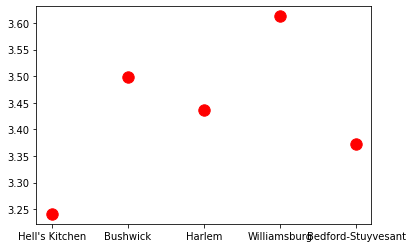

In [14]:
best5neighbourhoods = df["neighbourhood"]
df = data.groupby(by = ["neighbourhood"]).mean()["calification_num"]
califications = df.loc[best5neighbourhoods]
plt.scatter(best5neighbourhoods, califications, s = 130, c = "red")

Como podemos observar en el diagrama de burbujas, el barrio más solicitado, es decir, el barrio con más media de reseñas por mes, es Williamsburg con una media de calificación de algo mayor que 3.60. Seguido de Bushwick con una media de 3.50.

Como era de esperar, el más solicitado tenía que ser Williamsburg ya que comparando en el ranking del apartado 1), era el que estaba en la posición más alta de los cinco.

In [15]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,calification,calification_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,Baja,6,Altamente disponible,Malo,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,Baja,2,Altamente disponible,Malo,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,Baja,1,Altamente disponible,Malo,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,Baja,1,Disponible normalmente,Regular,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,Baja,1,Poco disponible,Bueno,4


## Apartado 3
Una  vez  obtenida  la  información  del  apartado  anterior,  queremos  tratar  de  entender  las 
diferencias  de  precio  entre  alquilar  un  apartamento  entero  y  una  habitación  privada.  Usa  los diagramas de 
cajas donde cada uno de los 5 barrios más populares está representado por una caja y haz una interpretación 
de los resultados. 

In [16]:
# Creamos una base de datos vacía y añadimos las nuevas columnas vacías
df = data[data['neighbourhood'].isin(best5neighbourhoods)]
df = df[['neighbourhood', 'room_type','price']].copy()

# No nos interesan las habitaciones compartidas
df.drop(df[df['room_type'] == 'Shared room'].index, inplace = True)

# Separamos los barrios y los precios en funciónn del tipo de habitación
df_private = df[df['room_type'] == 'Private room']
df_entire = df[df['room_type'] == 'Entire home/apt']

Lo que hemos realizado en esta parte de código son dos dataframes distintos; uno que contiene las habitaciones privadas y otro con los apartamentos enteros. 

Ambos incluyen el nombre del barrio, el tipo de habitación y el precio; que son las características que nos interesan mostrar.

A continuación, realizamos dos diagramas de cajas. El primero para representar los precios de las habitaciones privadas y así, poder comparar entre los distintos barrios. Y el segundo lo mismo teniendo en cuenta los apartamentos enteros.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


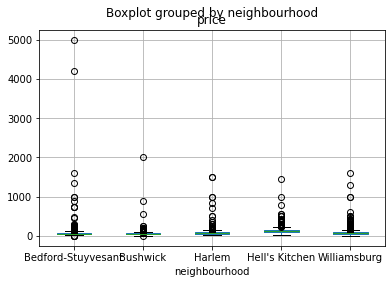

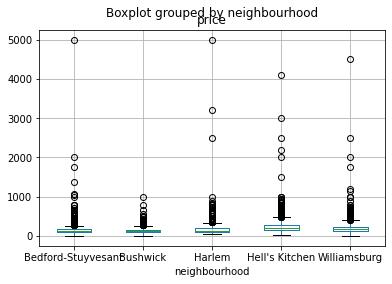

In [17]:
# Crear gráfico de las habitaciones privadas
df_private.boxplot(column = ['price'], by = 'neighbourhood')

# Crear gráfico de los apartamentos enteros
df_entire.boxplot(column = ['price'], by = 'neighbourhood')

Debido a que hay muchos valores outliers no se puede sacar una conclusión clara, por esta razón vamos a volver a representar los diagramas de cajas, pero esta vez sin mostrar los outliers para tener una visión más clara de los datos y poder sacar conclusiones.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


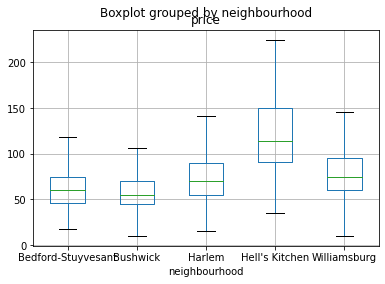

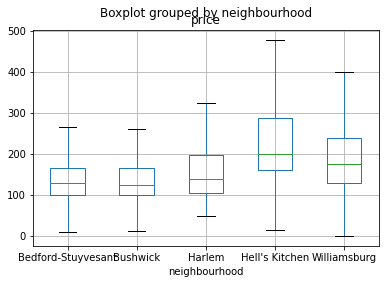

In [18]:
# Crear gráfico de las habitaciones privadas
df_private.boxplot(column = ['price'], by = 'neighbourhood', showfliers=False)

# Crear gráfico de los apartamentos enteros
df_entire.boxplot(column = ['price'], by = 'neighbourhood', showfliers=False) 

Observando las dos gráficas, a primera vista podemos decir que esta claro que en el barrio de Hell's Kitchen los precios están mucho más caros y dispersos, en general, que en el resto de los barrios.

También podemos concluir que en los barrios 'Bedford-Stuyvesan', 'Bushwick' y 'Harlem', los precios estan más o menos igual repartidos. Por tanto, da igual en que barrio te quieras alojar que los precios van a rondar en los mismos rangos.

Los precios más bajos se encuentran en el barrio de Bushwick, pero a la hora de precio/calidad, habrá que comprobar otros barrios que a lo mejor sean un poco más caros pero ofrezcan una mejor calidad. 

Esto podriamos deducir de estos gráfico; sin embargo, volviendo al apartado 2, el barrio de 'Bushwick' tiene mejor calidad (3.50 de media de calificación) que Harlem, por ejemplo.

Como conclusión, diríamos que a la hora de escoger un apartamento, la mejor opción sería en 'Bushwick', pues tiene la mejor relación calidad/precio. Por dar un ejemplo, el barrio de 'Hell's Kitchen' parece que es bastante bueno ya que los precios son más altos, pero al observar la media de calificaciones es bastante baja.

Es por estos detalles, que razonamos que a la hora de escoger un apartamento, se deben tener en cuenta más parámetros.

## Apartado 4
Por  último,  se  intuye  que  la  tendencia  a  dejar  reseñas  en  las  apps  que  prestan  servicios,  ha aumentado  en  los  últimos  años.  Decide  que  diagrama  es  más  útil  para  este  caso.  Dibújalo  y  realiza  una interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso.

###Preparación y conversión de datos
Borramos de la base de datos aquellos apartamentos que no tienen ninguna reseña, ya que no los vamos a utilizar y ya no los necesitamos en más apartados.

Creamos una nueva columna 'year_last_review' que contiene el año de la última reseña realizada y lo convertimos a tipo numérico.

Establecemos un nuevo dataframe que contenga solo el 'id' del apartamento y la columna de 'year_last_review' (para que sea más sencillo graficar).

Y realizamos un groupby en función del año para sacar el número total de reseñas por año.

In [19]:
# Borramos de la base de datos aquellos apartamentos que no tienen ninguna
data = data.dropna(subset = ['last_review'])

# Convertimos la columna de 'last_review' de 'object' a tipo 'string'
data = data.astype({'last_review': 'str'})

# Añadimos la nueva columna vacía 'year_last_review' y la convertimos a string para poder trabajar con ella.
data['year_last_review'] = data.apply(lambda _: '', axis=1)
data['num_year'] = data.apply(lambda _: '', axis=1)
data = data.astype({'year_last_review': 'str'})

# De esta manera, 'year_last_review' contendrá solo el año en el que se hizo la última reseña del mismo.
data['year_last_review'] = data['last_review'].str[:4]

# Convertimos dicha columna en tipo entero
data = data.astype({'year_last_review': 'int'})

# Creamos un nuevo df que contiene solo dos columnas, una con el total de reseñas por año y otra con el año al que pertenece dicha suma
df = data[['id', 'year_last_review']].copy()

df = df.groupby('year_last_review').count()

# Renombramos la columna (para que tenga sentido lo que contiene).
df = df.rename(columns = {'id':'num_reviews_per_year'})
# Vemos el nuevo dataframe
df

,num_reviews_per_year
year_last_review,
2011,7
2012,25
2013,48
2014,199
2015,1393
2016,2707
2017,3205
2018,6050
2019,25208


Mostramos el diagrama de líneas que representa los años en función del número de reseñas y procedemos a realizar la comprobación de que se han cogido todas las reseñas creadas.

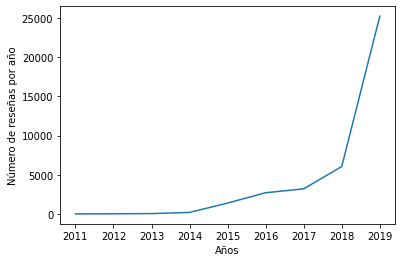


Se ha realizado correctamente.


In [20]:
# Vector con los años a graficar
years = data['year_last_review'].drop_duplicates()

years = years.sort_values()
# 'number_reviews_per_year' array que contiene el número de reseñas por año
number_reviews_per_year = df['num_reviews_per_year'].to_numpy()

fig, ax = plt.subplots()

ax.plot(years, number_reviews_per_year)
plt.xlabel('Años')
plt.ylabel('Número de reseñas por año')
plt.show()

# Comprobación de que se han tenido en cuenta todas las filas
# 'Total' tiene que ser igual al número total de filas que contiene data 
total = 0

for i in range(len(number_reviews_per_year)):
  total = total + number_reviews_per_year[i]

if total == len(data):
  print('\nSe ha realizado correctamente.')
else:
   print('\nHa habido un error. El número de datos no se corresponde.')


###Conclusión
El gráfico nos representa de una forma muy clara como las reseñas siguen una función exponencial, prácticamente, a lo largo de los años. 

A partir de 2014, comienzan a crecer el número de reseñas. Podemos concluir que es cierto que la tendencia de dejar reseñas en las apps aumenta según pasan los años, esto se debe al gran incremento del uso de AirBnB en los últimos años, y a la forma en la que los usuarios se fían más de un apartamento u otro en función de las reseñas de usuarios previos.

Es por ello, que a día de hoy, los anfitriones de los apartamentos piden directamente al cliente que deje una reseña, buscando una mejor puntuación que conlleve una afluencia mayor de usuarios que se interesen por su apartamento.